In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv('SCALE불량.csv', engine='python', encoding='euc-kr')
df.drop(['PLATE_NO','ROLLING_DATE'], axis=1, inplace=True)

df['SCALE'].replace('양품',0,inplace=True)
df['SCALE'].replace('불량',1,inplace=True)
df.head()

df['HSB'].replace('미적용',0,inplace=True)
df['HSB'].replace('적용',1,inplace=True)
df.head()

df_raw=df


df_raw.loc[df_raw['ROLLING_TEMP_T5']==0, "ROLLING_TEMP_T5"]=np.nan
#압연온도가 0도인 것은 이상치인것으로 볼 수 있다. 0인 데이터 6개. 723도는 박스를 벗어나있지만 큰 차이 없어 바꾸지 않겠음.
df_raw["ROLLING_TEMP_T5"].fillna(df_raw['ROLLING_TEMP_T5'].mean(), inplace=True)


df_raw.drop(['FUR_EXTEMP'], axis=1, inplace=True)

df_raw["STEEL_C"] = 0
for i in range(len(df_raw)):
    df_raw["STEEL_C"].iloc[i] = np.where(df_raw["STEEL_KIND"][i][0] == "C", 1, 0)
df_raw.head()



/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,STEEL_C
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,934.0,1,8,2조,0
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,937.0,1,8,2조,0
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,889.0,1,8,3조,0
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,885.0,1,8,3조,0
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,873.0,1,8,1조,0


In [4]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

df_raw_y=df_raw_dummy['SCALE']
df_raw_x=df_raw_dummy.drop('SCALE', axis=1, inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data X size:{}".format(df_test_y.shape))

train data X size:(504, 96)
train data Y size:(504,)
test data X size:(216, 96)
test data X size:(216,)


In [5]:
model=['DT','RF','GB','SVM','KNN','NeuralNet']

train_accuracy=[]; test_accuracy=[]
model_f1_score=[]
model_auc=[]

In [42]:
'''
log_model=Logit.from_formula('''SCALE~HSB''', data=df_train)
log_result=log_model.fit()

y_pred_train=log_result.predict(df_test)
y_pred_train_class=(y_pred_train>0.5).astype(int)
 
y_pred_test=log_result.predict(df_test)
y_pred_test_class=(y_pred>0.5).astype(int)
    
    
train_accuracy.append(accuracy_score(df_train['SCALE'],y_pred_train_class))
test_accuracy.append(accuracy_score(df_test['SCALE'],y_pred_test_class))

                     
fpr,tpr,thresholds=roc_curve(df_test,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)
'''

         Current function value: 0.574192
         Iterations: 35


/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: Found input variables with inconsistent numbers of samples: [576, 144]

In [ ]:
'''
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()
'''

In [ ]:
'''
model_f1_score.append(f1_score(df_test_y,y_pred))
'''

# 의사결정나무

In [6]:
dt_model=DecisionTreeClassifier(criterion='gini',min_samples_leaf=11,max_depth=8,random_state=1234)
dt_model.fit(df_train_x,df_train_y)

train_accuracy.append(dt_model.score(df_train_x,df_train_y))
test_accuracy.append(dt_model.score(df_test_x,df_test_y))

y_pred=dt_model.predict(df_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

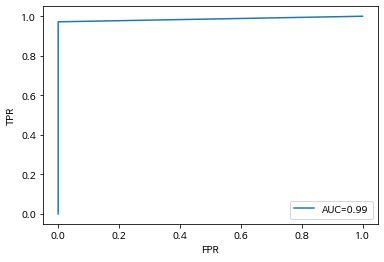

In [7]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [8]:
model_f1_score.append(f1_score(df_test_y,y_pred))

# 렌덤 포래스트

In [9]:
rf_model=RandomForestClassifier(min_samples_leaf=10,min_samples_split=50, max_depth=7,n_estimators=40,random_state=1234)
rf_model.fit(df_train_x,df_train_y)

train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x,df_test_y))

y_pred=rf_model.predict(df_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

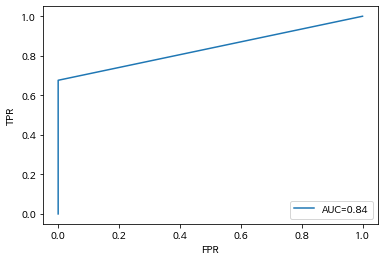

In [10]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [11]:
model_f1_score.append(f1_score(df_test_y,y_pred))

# 그래디언트 부스팅

In [12]:
gb_model=GradientBoostingClassifier(min_samples_leaf=10,min_samples_split=30,max_depth=5,n_estimators=60,learning_rate=0.3,random_state=1234)
gb_model.fit(df_train_x,df_train_y)

train_accuracy.append(gb_model.score(df_train_x,df_train_y))
test_accuracy.append(gb_model.score(df_test_x,df_test_y))

y_pred=gb_model.predict(df_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

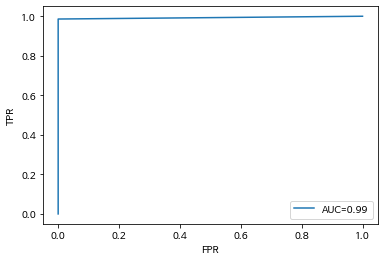

In [13]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [14]:
model_f1_score.append(f1_score(df_test_y,y_pred))

# svm

In [15]:
v_feature_names=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_names)


In [16]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3, random_state=1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(504, 96)
test data X size:(216, 96)


In [17]:
svc_model=SVC(gamma=0.01,C=1, random_state=1234)

svc_model.fit(df_scaled_train_x, df_train_y)

train_accuracy.append(svc_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(svc_model.score(df_scaled_test_x,df_test_y))

y_pred=svc_model.predict(df_scaled_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

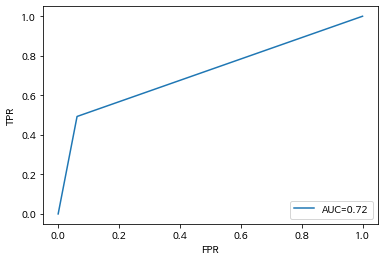

In [18]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [19]:
model_f1_score.append(f1_score(df_test_y,y_pred))

# knn

In [20]:
knn_model=KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
knn_model.fit(df_train_x, df_train_y)

train_accuracy.append(knn_model.score(df_train_x,df_train_y))
test_accuracy.append(knn_model.score(df_test_x,df_test_y))

y_pred=knn_model.predict(df_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

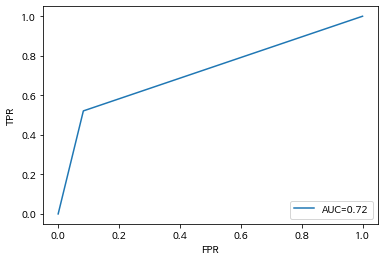

In [21]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [22]:
model_f1_score.append(f1_score(df_test_y,y_pred))

# 인공신경망

In [23]:
v_feature_names=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_names)


In [24]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3, random_state=1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(504, 96)
test data X size:(216, 96)


In [25]:
nn_model=MLPClassifier(hidden_layer_sizes=(140,140),activation='logistic',solver='adam',batch_size=40,   
                     random_state=1234)
nn_model.fit(df_scaled_train_x,df_train_y)

train_accuracy.append(nn_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x,df_test_y))

y_pred=nn_model.predict(df_scaled_test_x)

fpr,tpr,thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


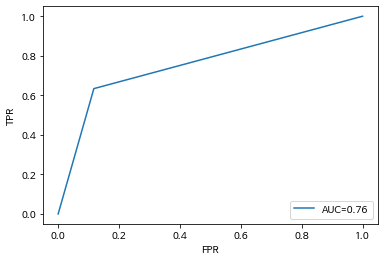

In [26]:
plt.plot(fpr,tpr,label='AUC=%0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [27]:
model_f1_score.append(f1_score(df_test_y,y_pred))

# 회귀

# 모델평가

In [28]:
df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DT,0.980,0.991,0.986,0.986
RF,0.897,0.894,0.807,0.838
GB,1.000,0.995,0.993,0.993
SVM,0.885,0.792,0.609,0.715
KNN,0.813,0.787,0.617,0.719
NeuralNet,0.980,0.801,0.677,0.758


<Figure size 7200x5760 with 0 Axes>

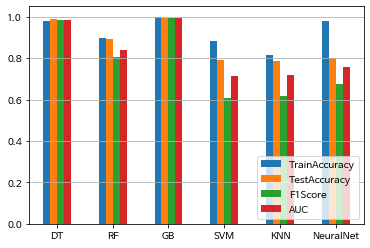

<Figure size 7200x5760 with 0 Axes>

In [29]:
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.figure(figsize=(100,80))